## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



In [22]:
df = pd.read_csv("adult.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 1 Clean the `income` variable such that it has only two values

df['income'].unique()

we see that we have a prolem with the "." so we rome it so we only have 2 values.

In [23]:
df['income'] = df['income'].str.replace(r'\.$', '', regex=True)

In [24]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### 2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.

I want to check age and education level.

lets check this features and see if they need cleaning

In [25]:
print(df['education'].isnull().sum())
print(df['age'].isnull().sum())


0
0


In [26]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [27]:
df['education'].unique().sum()

'BachelorsHS-grad11thMasters9thSome-collegeAssoc-acdmAssoc-voc7th-8thDoctorateProf-school5th-6th10th1st-4thPreschool12th'

In [28]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

looks fine

In [29]:

X = df[['age', 'education']]
y = df['income']

# Transform the categorical 'education' variable using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['education'], drop_first=True)

scaler = MinMaxScaler()
# Fit and transform the 'age' feature in X_encoded
X_encoded['age'] = scaler.fit_transform(X_encoded[['age']])
print(X_encoded.head())

        age  education_11th  education_12th  education_1st-4th  \
0  0.301370           False           False              False   
1  0.452055           False           False              False   
2  0.287671           False           False              False   
3  0.493151            True           False              False   
4  0.150685           False           False              False   

   education_5th-6th  education_7th-8th  education_9th  education_Assoc-acdm  \
0              False              False          False                 False   
1              False              False          False                 False   
2              False              False          False                 False   
3              False              False          False                 False   
4              False              False          False                 False   

   education_Assoc-voc  education_Bachelors  education_Doctorate  \
0                False                 True           

### 3. Create X and y dataset and split the datasets into training and testing sets

we have our features from our previous encoding (features: 'age' and one-hot encoded 'education')

In [30]:

X = X_encoded  
y = df['income']

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (39073, 16)
Testing set shape: (9769, 16)


    ### 4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks

Lets try out some differint k's

In [38]:
kacclist = [] # list to store accuracy scores
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use 5-fold cross-validation on the full dataset (X_encoded, y)
    scores = cross_val_score(knn, X_encoded, y, cv=5, scoring='accuracy')
    kacclist.append({"Folds": k, "Mean accuracy": scores.mean()})
kaccuracyDF = pd.DataFrame(kacclist)
kaccuracyDF["Mean accuracy"].describe()

count    20.000000
mean      0.769399
std       0.014493
min       0.718971
25%       0.766390
50%       0.772174
75%       0.777906
max       0.785697
Name: Mean accuracy, dtype: float64

In [46]:
kacclist

[{'Folds': 1, 'Mean accuracy': np.float64(0.7189711177504196)},
 {'Folds': 2, 'Mean accuracy': np.float64(0.7563368584993111)},
 {'Folds': 3, 'Mean accuracy': np.float64(0.7538799147280055)},
 {'Folds': 4, 'Mean accuracy': np.float64(0.7668195114684009)},
 {'Folds': 5, 'Mean accuracy': np.float64(0.7650997648464124)},
 {'Folds': 6, 'Mean accuracy': np.float64(0.7683346545998813)},
 {'Folds': 7, 'Mean accuracy': np.float64(0.7679047860617111)},
 {'Folds': 8, 'Mean accuracy': np.float64(0.7696653863124331)},
 {'Folds': 9, 'Mean accuracy': np.float64(0.7639735402121521)},
 {'Folds': 10, 'Mean accuracy': np.float64(0.774681634285995)},
 {'Folds': 11, 'Mean accuracy': np.float64(0.7696041079652505)},
 {'Folds': 12, 'Mean accuracy': np.float64(0.7754186428027149)},
 {'Folds': 13, 'Mean accuracy': np.float64(0.7756030143992064)},
 {'Folds': 14, 'Mean accuracy': np.float64(0.777629953397688)},
 {'Folds': 15, 'Mean accuracy': np.float64(0.7770362239141029)},
 {'Folds': 16, 'Mean accuracy': np.f

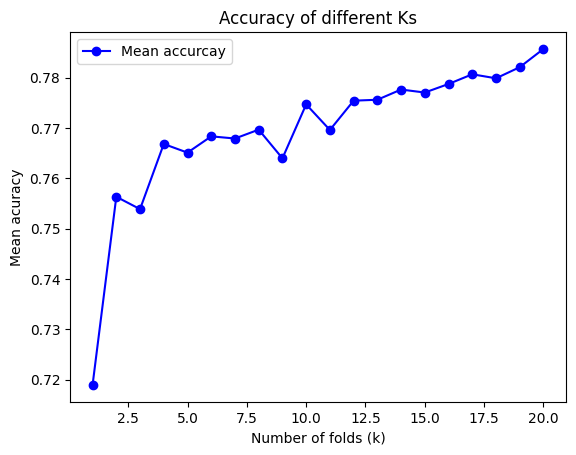

In [39]:
plt.plot(kaccuracyDF["Folds"], kaccuracyDF["Mean accuracy"], label = "Mean accurcay", color='blue', marker='o', linestyle='solid')    
plt.xlabel('Number of folds (k)')
plt.ylabel('Mean acuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

The results show that KNN reaches its highest cross-validated accuracy of about 0.786 at k=20, with performance ranging from roughly 0.719 to 0.786 across all tested k values. As k increases, the model appears to benefit from additional smoothing, eventually peaking at k=20. We therefore select k=20 for our final model. Overall, KNN demonstrates consistent results for predicting income with the chosen features, though performance does vary slightly based on k.

let take a look 

In [76]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train, y_train)
y_pred_knn20 = knn20.predict(X_test)
knn20_accuracy = accuracy_score(y_test, y_pred_knn20)
print("KNN (k=20) Test Accuracy:", knn20_accuracy)

KNN (k=20) Test Accuracy: 0.7864673968676426


In [79]:
confusion_matrix(y_test, y_pred_knn20)

array([[7001,  430],
       [1656,  682]])

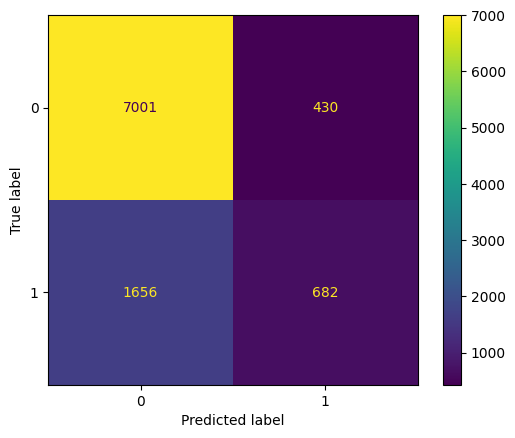

In [83]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn20)).plot()

True Negatives (top-left, 7001): These are instances truly “<=50K” and predicted “<=50K.”
False Positives (top-right, 430): These are instances truly “<=50K” but predicted “>50K.”
False Negatives (bottom-left, 1656): These are instances truly “>50K” but predicted “<=50K.”
True Positives (bottom-right, 682): These are instances truly “>50K” and predicted “>50K.

### 5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.

In [74]:

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set using logistic regression
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Test Accuracy:", logreg_accuracy)

Logistic Regression Test Accuracy: 0.7821680827106152


It looks like the logistic regression classifier did slightly worse than our KNN=20, but its so close so i would say its on par.  0.785697 vs  0.7821680827106152

lets take look at the confuisson matrix to see what kind of mistakes it makes compared to the knn.

[[7035  396]
 [1738  600]]


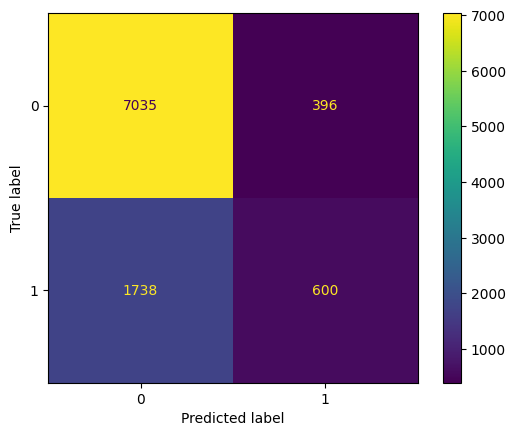

In [65]:
# Compute the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Create a ConfusionMatrixDisplay instance and plot it
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot()


print(cm_logreg)

Comparing this to knn20 confusion matrix show a trade-off in how the models classify “>50K” versus “≤50K.” Logistic regression correctly labels more “≤50K” individuals (7035 TN, 396 FP) but misses more “>50K” cases (1738 FN, 600 TP). By contrast, KNN identifies more “>50K” individuals (682 TP) but also incorrectly labels more “≤50K” cases as “>50K” (430 FP). The choice between the two depends on which error false positives or false negatives matters more for the specific goals.

### 6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [89]:
# Train the decision tree on the training set
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = dtree.predict(X_test)



In [90]:
# Evaluate the model
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Test Accuracy:", dtree_accuracy)

Decision Tree Test Accuracy: 0.7890265124373017


In [91]:
# Confusion Matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix - Decision Tree:")
print(cm_dtree)

Confusion Matrix - Decision Tree:
[[6909  522]
 [1539  799]]


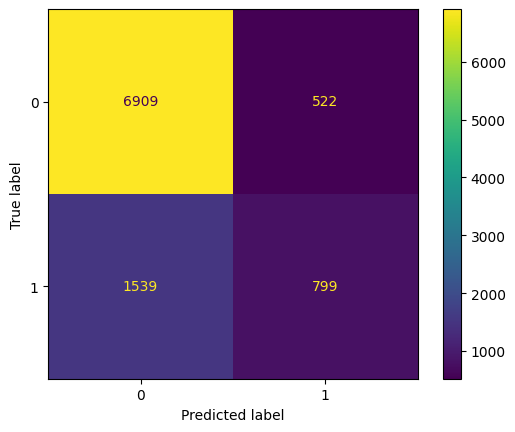

In [92]:
ConfusionMatrixDisplay(cm_dtree).plot()

The decision tree classifier achieved an accuracy of about 78.9%, which is a slight improvement over the previous models. Its confusion matrix shows that it correctly classified 6909 “≤50K” cases and 799 “>50K” cases, with 522 false positives and 1539 false negatives. Compared to logistic regression and KNN, the decision tree appears to strike a good balance between the two classes, though it still misclassifies some “>50K” instances. Overall, it demonstrates competitive performance on predicting income using the selected features.

### 6 Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [95]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", rf_accuracy)

Random Forest Test Accuracy: 0.7892312416828744


In [96]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:")
print(cm_rf)


Confusion Matrix - Random Forest:
[[6881  550]
 [1509  829]]


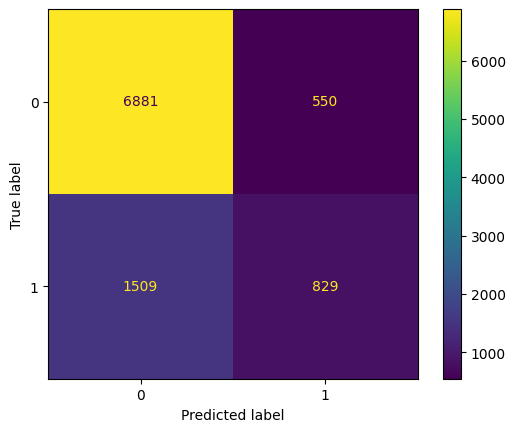

In [97]:
ConfusionMatrixDisplay(cm_rf).plot()

these results are very simmilar to the priors 

### 8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [101]:
# Train an AdaBoost classifier on the training set (using 50 estimators by default)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Test Accuracy:", ada_accuracy)

AdaBoost Test Accuracy: 0.7905619817790971


In [102]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix - AdaBoost:")
print(cm_ada)

Confusion Matrix - AdaBoost:
[[6870  561]
 [1485  853]]


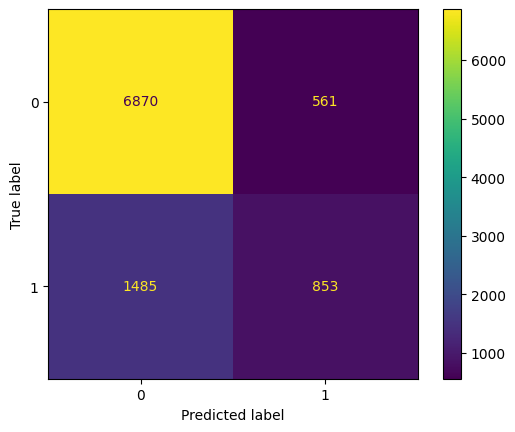

In [103]:
ConfusionMatrixDisplay(cm_ada).plot()

AdaBoost achieved a test accuracy of approximately 79.06%. Its confusion matrix shows that it correctly classified 6870 "≤50K" cases and 853 ">50K" cases, with 561 false positives and 1485 false negatives. This performance is comparable to, and slightly better than, some of the other models (like KNN and decision trees), reflecting AdaBoost's strength in combining multiple weak learners for a more robust overall prediction. Depending on the specific cost of misclassifications, AdaBoost can be a strong choice for income prediction.